In [11]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [12]:
# Read in the dataset
trainfile = "train.csv"
train_df = pd.read_csv(trainfile, engine='python', on_bad_lines='skip')
train_df = train_df.drop(columns=["title", "author"])
print("Training Sample:\n", train_df.head(), "\n________________________________________________________________")

Training Sample:
    id                                               text  label
0   0  house dem aide even see comey letter jason cha...      1
1   1  ever get feeling life circles roundabout rathe...      0
2   2  truth might get fired october 29 2016 tension ...      1
3   3  videos 15 civilians killed single us airstrike...      1
4   4  print iranian woman sentenced six years prison...      1 
________________________________________________________________


In [17]:
# Assign input and output variables
X = train_df['text']
y = train_df['label']

In [18]:
# Calculate term frequency
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(X)

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
# create a neural network classifier
clf = MLPClassifier(hidden_layer_sizes=(10,), alpha=0.5, max_iter=200, solver='adam', random_state=42, early_stopping=True)
clfSigmoid = MLPClassifier(hidden_layer_sizes=(10,), alpha=0.5, max_iter=200, solver='adam', random_state=42, activation="logistic", early_stopping=True)
clfHyperbolic = MLPClassifier(hidden_layer_sizes=(10,), alpha=0.5, max_iter=200, solver='adam', random_state=42, activation="tanh", early_stopping=True)

In [92]:
# fit the training data to the model
clf.fit(X_train, y_train)
clfSigmoid.fit(X_train, y_train)
clfHyperbolic.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.5, early_stopping=True,
              hidden_layer_sizes=(10,), random_state=42)

In [93]:
# Print the scores of the training set and test set
print("Training set score: %f" % clf.score(X_train, y_train))
print("Training set score for Sigmoid: %f" % clfSigmoid.score(X_train, y_train))
print("Training set score for Hyperbolic: %f" % clfHyperbolic.score(X_train, y_train))

print("Test set score: %f" % clf.score(X_test, y_test))
print("Test set score for Sigmoid: %f" % clfSigmoid.score(X_test, y_test))
print("Test set score for Hyperbolic: %f" % clfHyperbolic.score(X_test, y_test))

Training set score: 0.982351
Training set score for Sigmoid: 0.929141
Training set score for Hyperbolic: 0.974712
Test set score: 0.951541
Test set score for Sigmoid: 0.911772
Test set score for Hyperbolic: 0.946800


In [94]:
# Predict the target values for the test data
y_pred = clf.predict(X_test)
y_predSigmoid = clfSigmoid.predict(X_test)
y_predHyperbolic = clfHyperbolic.predict(X_test)

In [95]:
# Compute the model's training accuracy
print("Training Accuracy: {:.2f}%".format(clf.score(X_train, y_train)*100))
print("Training Accuracy for Sigmoid: {:.2f}%".format(clfSigmoid.score(X_train, y_train)*100))
print("Training Accuracy for Hyperbolic: {:.2f}%".format(clfHyperbolic.score(X_train, y_train)*100))

# Compute the model's testing accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy: {:.2f}%".format(accuracy * 100))
accuracySigmoid = accuracy_score(y_test, y_predSigmoid)
print("Testing Accuracy for Sigmoid: {:.2f}%".format(accuracySigmoid * 100))
accuracyHyperbolic = accuracy_score(y_test, y_predHyperbolic)
print("Testing Accuracy for Hyperbolic: {:.2f}%".format(accuracyHyperbolic * 100))

Training Accuracy: 98.24%
Training Accuracy for Sigmoid: 92.91%
Training Accuracy for Hyperbolic: 97.47%
Testing Accuracy: 95.15%
Testing Accuracy for Sigmoid: 91.18%
Testing Accuracy for Hyperbolic: 94.68%


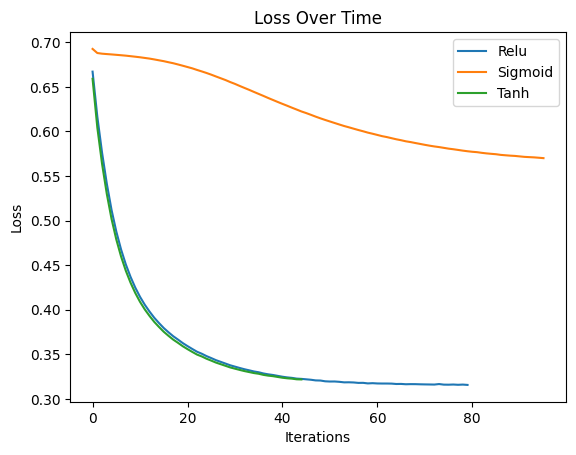

In [96]:
# Create a Plot for comparing "Iterations" to "Loss"
plt.plot(clf.loss_curve_, label = "Relu")
plt.plot(clfSigmoid.loss_curve_, label = "Sigmoid")
plt.plot(clfHyperbolic.loss_curve_, label = "Tanh")
plt.title("Loss Over Time")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [97]:
# create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmSigmoid = confusion_matrix(y_test, y_predSigmoid)
cmHyperbolic = confusion_matrix(y_test, y_predHyperbolic)

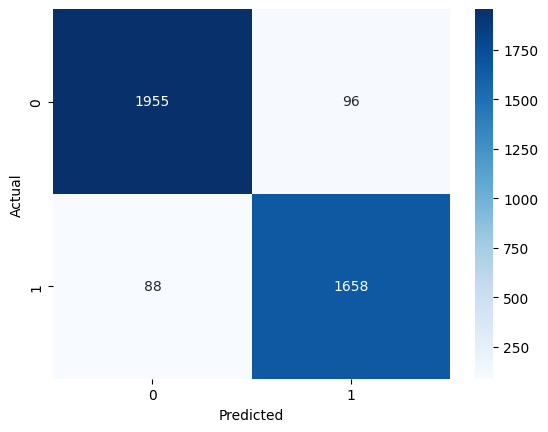

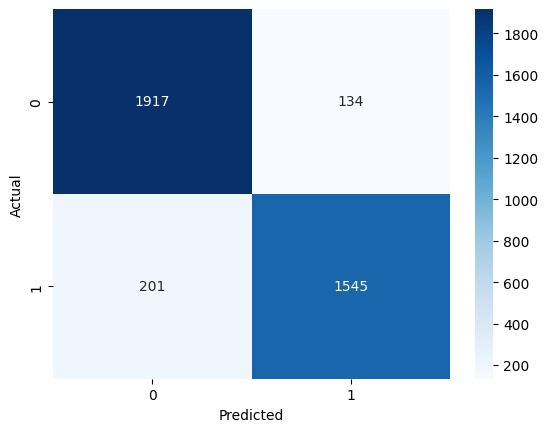

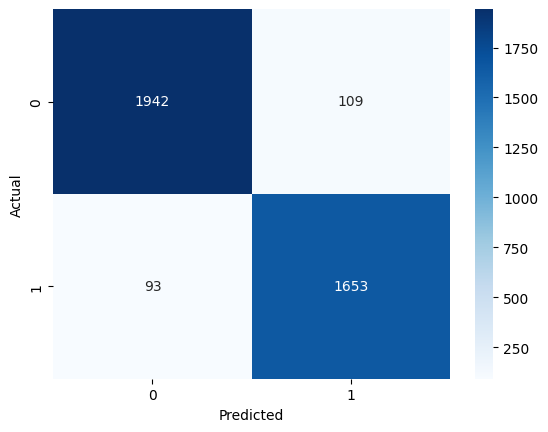

In [98]:
# create a heatmap to visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

sns.heatmap(cmSigmoid, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

sns.heatmap(cmHyperbolic, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()